# <center>Algoritmo Genético<center>

In [1]:
from random import randint,uniform,random
from tqdm import tqdm
import numpy as np

In [2]:
LIMITE_INFERIOR = 0
LIMITE_SUPERIOR = 300
SIZE_POP = 300
QTD_VAR = 2
QTD_GERACOES = 100
TAXA_CRUZAMENTO = 0.85
TAXA_MUTACAO = 0.01
QTD_TROCA = 2 #qtd de posicoes a serem trocadas na mutação

def funcao_objetivo(x):
    return x[0]**2+x[1]**2

In [3]:
def funcao_objetivo(x):
    return -1*(-1/4*x[0]**2-3/8*x[1]**2-1/4*x[0]*x[1]+120*x[0]+100*x[1]-5000)+1000*(x[0]+x[1]-230)**2

In [4]:
def geraca_populacao():
    populacao = np.zeros((SIZE_POP,QTD_VAR))
    for individuo in range(SIZE_POP):
        for pos in range(QTD_VAR):
            populacao[individuo,pos] = uniform(LIMITE_INFERIOR, LIMITE_SUPERIOR)
    return populacao

In [5]:
def calcula_fo(pop):
    valor_fo = np.zeros(SIZE_POP)
    for individuo in range(SIZE_POP):
        valor_fo[individuo] = funcao_objetivo(pop[individuo,:])
    return valor_fo

In [6]:
def fitness(valor_fo):
    return valor_fo

In [7]:
def selecao(valor_fitness):
    pos = np.random.choice(range(SIZE_POP),  2 ,replace=False)
    valor = valor_fitness[pos[0]]<valor_fitness[pos[1]]
    if valor == True:
        return  pos[0]
    else: 
        return pos[1]

In [8]:
def cruzamento(pai1,pai2):
    x = random()
    filho1 = x*pai1+(1-x)*pai2
    filho2 = (1-x)*pai1+x*pai2
    return filho1,filho2

In [9]:
def mutacao(individuo):
    pos = np.random.choice(range(QTD_VAR),  QTD_TROCA ,replace=False)
    individuo[pos[0]] = individuo[pos[1]]
    individuo[pos[1]] = individuo[pos[0]]
    return individuo

In [10]:
import matplotlib.pyplot as plt

In [11]:
def main_ga():
    pop = geraca_populacao()
    fo = calcula_fo(pop)
    print(pop)
    fit = fitness(fo)
    melhor_fo = np.zeros(QTD_GERACOES)
    melhor_ind_geracao = np.zeros((QTD_GERACOES, QTD_VAR))
    for geracao in range(QTD_GERACOES):
        new_pop = np.empty((0, QTD_VAR))
        for i in range(round((SIZE_POP) / 2)):
            pai1 = 0
            pai2 = 0
            while pai1 == pai2:
                pai1 = selecao(fit)
                pai2 = selecao(fit)
            if random() < TAXA_CRUZAMENTO:
                filho1, filho2 = cruzamento(pop[pai1, :], pop[pai2, :]) 
                if random() < TAXA_MUTACAO:    
                    filho1 = mutacao(filho1)
                    filho2 = mutacao(filho2)  
                new_pop = np.vstack([new_pop, filho1, filho2])     
            else:
                pais = np.vstack([pop[pai1, :], pop[pai2, :]])
                new_pop = np.vstack([new_pop, pais])
        pop = new_pop    
        fo = calcula_fo(pop)
        fit = fitness(fo)
        min_fo = min(fo)
        melhor_fo[geracao] = min_fo
        pos_min_fo = np.where(fo == min_fo)

    
    plt.plot(melhor_fo)
    plt.xlim(0, QTD_GERACOES)
    plt.ylabel('Gerações')
    plt.ylabel('Melhor Custo')
    plt.title('Evolução da função objetivo - GA')
    plt.grid(True)
    plt.show()
    

    return pop[pos_min_fo,:][0,0]

[[149.46341919 207.69214085]
 [203.50419864  53.89482977]
 [102.60720818 248.14165585]
 [ 84.74310893  20.00149186]
 [123.60940961 151.50800283]
 [ 47.54975812 227.16248904]
 [178.15026752  20.67395572]
 [271.907615   185.67805147]
 [  7.94482328  63.14393342]
 [192.44789474 106.65019493]
 [112.41275158  46.16518708]
 [266.96462522 146.91114375]
 [240.57831864  91.45441689]
 [ 33.4964315   66.1079553 ]
 [ 98.07338769 271.2212741 ]
 [189.82747757 132.79257415]
 [ 49.91951394 281.73843963]
 [222.69513733  48.42037943]
 [131.53105499 293.31413006]
 [ 98.62327751 258.29611543]
 [ 16.48066643   1.39317846]
 [ 72.35960572 174.40457945]
 [242.26809717 122.75338211]
 [ 33.12729198 284.00395692]
 [200.34907411 173.03163106]
 [152.00410288 124.47266496]
 [281.80709878  18.08774843]
 [106.48771554 232.04429491]
 [ 67.53740949 116.69061719]
 [118.3178705  110.60174389]
 [ 88.58498405 213.85536684]
 [ 49.78232024  48.24020501]
 [126.20695859 252.34101218]
 [ 69.59804293 261.68818233]
 [132.52848758

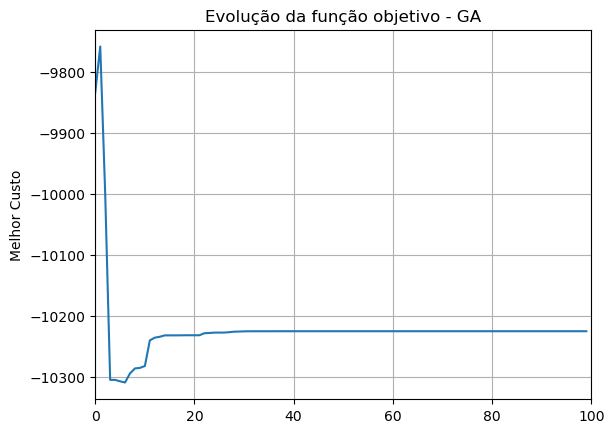

In [12]:
minimo = main_ga()

In [18]:
minimo

array([207.99989246,  63.99992823])

In [14]:
int(minimo.sum())

230

# <center>Maximizando Lucros<center>
    
$$L(x,y)=-\frac{1}{4}x^2-\frac{3}{8}y^2-\frac{1}{4}xy+120x+100y-5000$$
    
sujeito a: 
	
$$x+y=230$$
    
$$h(x,y)=x+y-230$$    

In [15]:
from scipy.optimize import Bounds
from scipy.optimize import minimize

bnds = Bounds(LIMITE_INFERIOR*np.ones(QTD_VAR), LIMITE_SUPERIOR*np.ones(QTD_VAR))

def h(x):
    return x[0]+x[1]-230

def funcao_objetivo(x):
    return -1*(-1/4*x[0]**2-3/8*x[1]**2-1/4*x[0]*x[1]+120*x[0]+100*x[1]-5000)

X0 = [100,130]

solucao = minimize(funcao_objetivo,X0,method='SLSQP', bounds=bnds,constraints={'type': 'eq', 'fun': h})

In [16]:
solucao.x

array([180.,  50.])

def fitness(valor_fo): #quanto maior o fitness (com escala em [0,1]), melhor é o indivíduo
    a = np.max(valor_fo)
    b = np.min(valor_fo)
    if a == b:
        return 1 ##ou muda todo mundo ou mostra
    else:
        c = a - valor_fo
        d = a - b
        return c/d
        
def fitness(fo): #ranking linear
    min_fo = min(fo)
    max_fo = max(fo)
    posicao_ordenada = np.argsort(fo)
    return min_fo+(max_fo-min_fo)*(SIZE_POP-posicao_ordenada)/(SIZE_POP-1)   
    
def selecao(valor_fitness): #roleta russa
    y = valor_fitness.cumsum()/np.sum(valor_fitness)
    u = random()
    j = 0
    while u>y[j]:
        j += 1
    return j    